The derivation for coordinate transformations exists in previous works, see https://arxiv.org/pdf/2111.02535.pdf (Remark 7.9.) and https://arxiv.org/pdf/1811.12926.pdf (B9)


In [6]:
from qiskit.circuit.library import SwapGate, iSwapGate
from qiskit import QuantumCircuit
from qiskit.quantum_info import random_unitary
from weylchamber import g1g2g3, c1c2c3, WeylChamber
from qiskit.quantum_info import Operator
import matplotlib.pyplot as plt

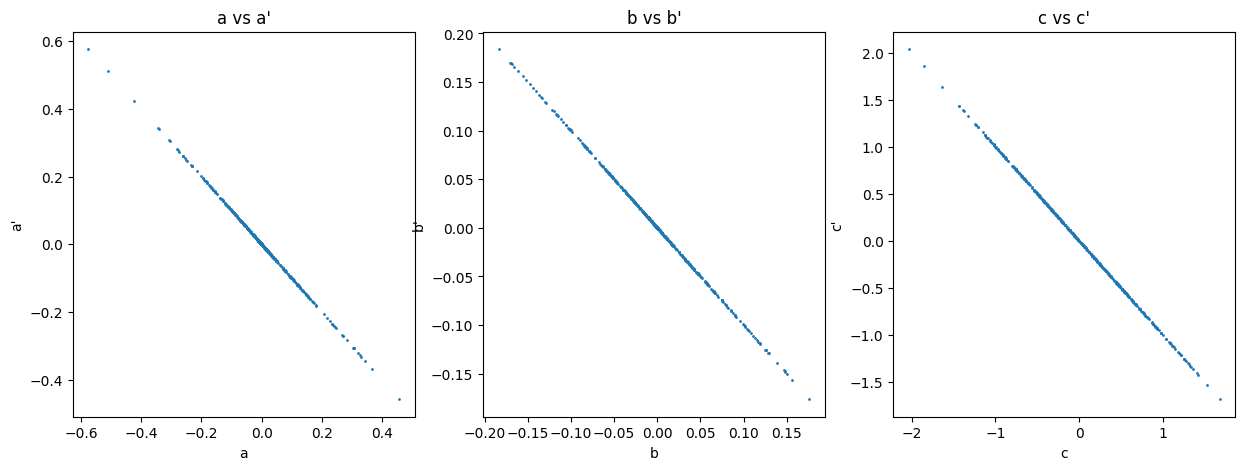

In [5]:
N = 500
# generate (a,b,c) ->swap-> (a',b',c') pairs
a_pairs, b_pairs, c_pairs = [], [], []
for _ in range(N):
    U = random_unitary(4).data
    U_prime = SwapGate().to_matrix() @ U
    abc = g1g2g3(U)
    abc_prime = g1g2g3(U_prime)
    a_pairs.append((abc[0], abc_prime[0]))
    b_pairs.append((abc[1], abc_prime[1]))
    c_pairs.append((abc[2], abc_prime[2]))
# plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (pairs, label) in enumerate(zip([a_pairs, b_pairs, c_pairs], ["a", "b", "c"])):
    axes[i].scatter(*zip(*pairs), s=1)
    axes[i].set_xlabel(f"{label}")
    axes[i].set_ylabel(f"{label}'")
    axes[i].set_title(f"{label} vs {label}'")
plt.show()

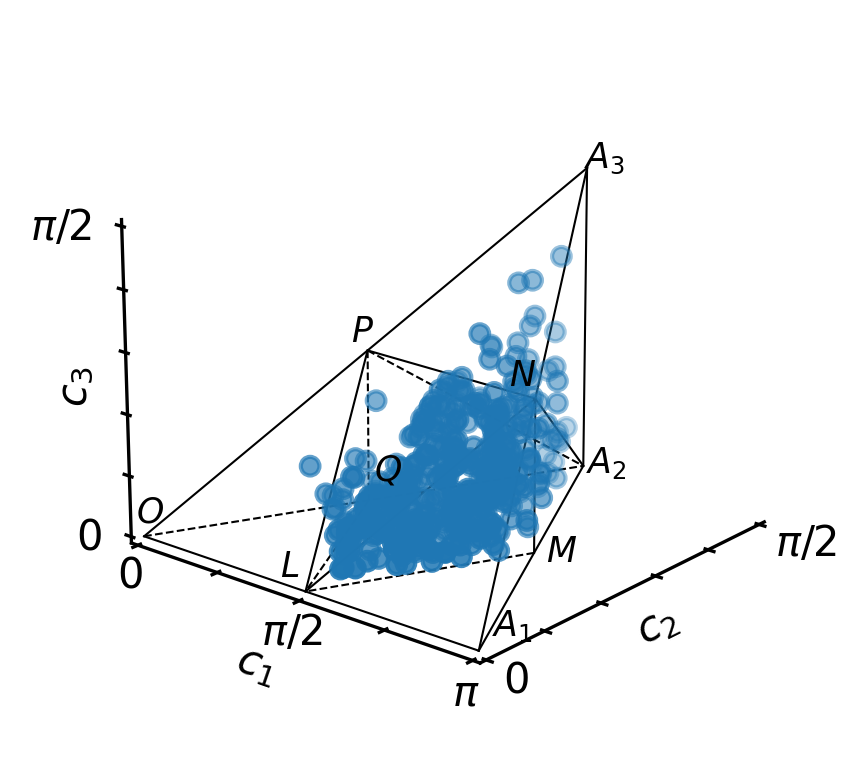

In [9]:
# experiment with random scattering
N = 400
# generate U + SWAP + U + SWAP
U = iSwapGate().power(3 / 4)
coords = []
for _ in range(N):
    qc = QuantumCircuit(2)

    qc.append(U, [0, 1])
    # random 1Q gate
    qc.append(random_unitary(2).to_instruction(), [0])
    qc.append(random_unitary(2).to_instruction(), [1])
    qc.append(U, [0, 1])
    qc.append(random_unitary(2).to_instruction(), [0])
    qc.append(random_unitary(2).to_instruction(), [1])
    qc.swap(0, 1)

    # get coordinates
    coords.append(c1c2c3(Operator(qc).data))

# plot
w = WeylChamber()
for c in coords:
    w.add_point(*c)
w.plot()